**Importing Requied LIbraries and Data Processing**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
cp=pd.read_csv(r'C:\Users\DAKSHIN\Desktop\PGP Analytics\Kaggle refernce\CANDY POWER RANK CLASSIFICATION\candy-data.CSV')

In [3]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
cp.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [5]:
cp.competitorname

0                      100 Grand
1                   3 Musketeers
2                       One dime
3                    One quarter
4                      Air Heads
                 ...            
80                     Twizzlers
81                      Warheads
82          WelchÕs Fruit Snacks
83    WertherÕs Original Caramel
84                      Whoppers
Name: competitorname, Length: 85, dtype: object

**Data Visualization**

In [8]:
numerical=cp.select_dtypes(include=np.number)

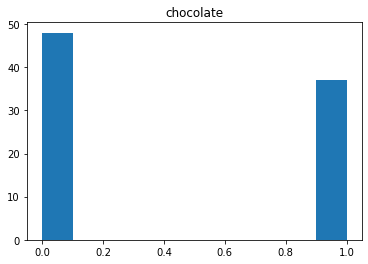

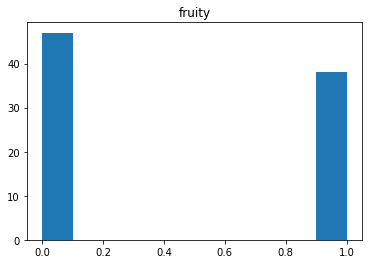

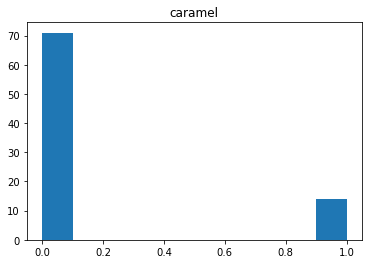

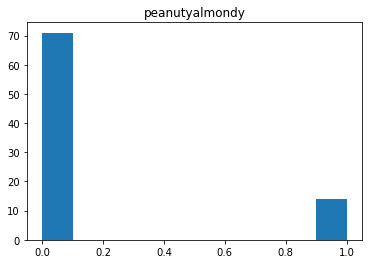

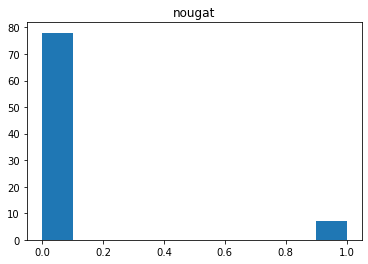

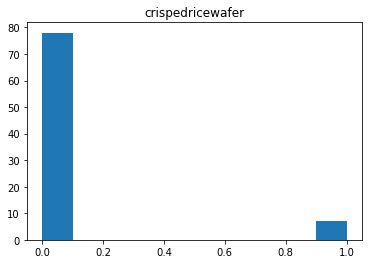

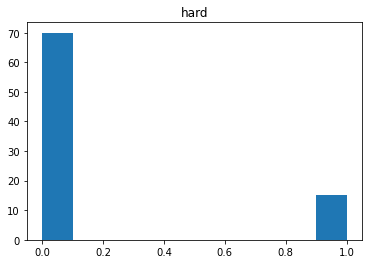

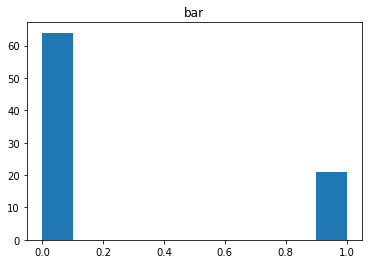

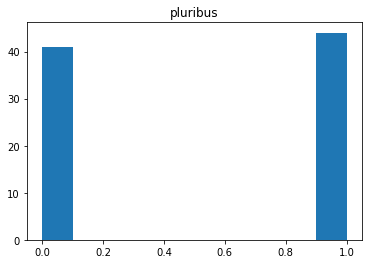

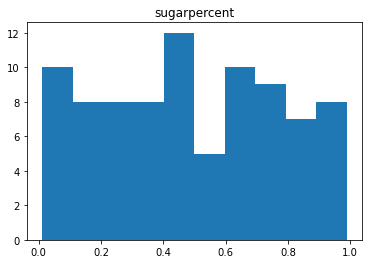

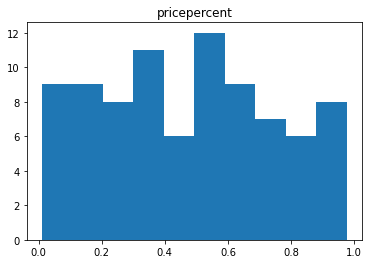

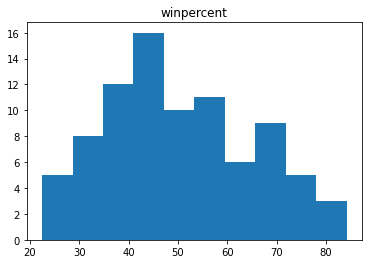

In [11]:
for x in numerical.columns:
    plt.figure(x)
    plt.title(x)
    plt.hist(x,data=cp)

**Model Building**

In [25]:
x=cp.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]]
y=cp['chocolate']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split (x,y,test_size=0.3,random_state=121)

In [28]:
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)

In [29]:
print(ypred)

[0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0]


In [31]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.77      0.87        13

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.91      0.88      0.88        26



In [32]:
dtc=DecisionTreeClassifier()
dtc_model=dtc.fit(xtrain,ytrain)
ypred2=dtc_model.predict(xtest)

In [33]:
ypred2

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0], dtype=int64)

**Classification_report and Confusion Matrix**

In [35]:
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.91      0.77      0.83        13

    accuracy                           0.85        26
   macro avg       0.85      0.85      0.85        26
weighted avg       0.85      0.85      0.85        26



In [39]:
rbf=RandomForestClassifier()
rbf_model=rbf.fit(xtrain,ytrain)
ypred3=rbf_model.predict(xtest)

In [41]:
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.77      0.87        13

    accuracy                           0.88        26
   macro avg       0.91      0.88      0.88        26
weighted avg       0.91      0.88      0.88        26



In [42]:
print(confusion_matrix(ytest,ypred3))

[[13  0]
 [ 3 10]]
